<a href="https://colab.research.google.com/github/huppybirthday/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

画像を使ってスライドパズル

In [143]:
#このセルでインポート
import numpy as np
import sys
import cv2
from google.colab.patches import cv2_imshow

In [144]:
#画像を読み込む
!wget "https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc" -O images.zip
!unzip -o images.zip

--2023-01-19 07:50:13--  https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.102, 142.251.2.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cq5p1sfllogtvh1rmtindhr2ccs80onc/1674114600000/05465361039627264646/*/1hsUauww6HMD9YMejBh72as9x9wNCWeBc?e=download&uuid=463306c4-760b-4797-857a-452da1e86608 [following]
--2023-01-19 07:50:14--  https://doc-04-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cq5p1sfllogtvh1rmtindhr2ccs80onc/1674114600000/05465361039627264646/*/1hsUauww6HMD9YMejBh72as9x9wNCWeBc?e=download&uuid=463306c4-760b-4797-857a-452da1e86608
Resolving doc-04-0o-docs.googleusercontent.com (doc-04-0o-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b

In [145]:
# 画像ファイルを読み込み，画像オブジェクトを作成して，変数 img に代入
img = cv2.imread('canal.jpg')

# エラー処理: 画像ファイルの読み込みが失敗の場合は，プログラム終了
if img is None:
  sys.exit('エラー: ファイルを開けませんでした')

In [158]:
#難易度×難易度マスを生成
dif = int(input("難易度："))

#縦と横を自然数に調整する処理
tate = img.shape[0] 
yoko = img.shape[1] 

if tate % dif != 0:
  tate = int(tate/dif)*dif
if yoko % dif != 0:
  yoko = int(yoko/dif)*dif

img = img[0:tate,0:yoko]
#print(tate,yoko)

#設定難易度ごとにマスの座標をリストに格納する処理
za_li = []
for i in range(dif):
  y = i*(tate/dif)
  for i2 in range(dif):
    x = i2 * (yoko/dif)
    za_li.append([int(y),int(x)])

#print(za_li)

#マスごとの画像に番号をつけ、リストに格納
num_li2 = []
for i in range(dif**2):
  num_li2.append(i)

for i in num_li2:
  exec("im{} = img[za_li[i][0]: za_li[i][0] + int(tate/dif) , za_li[i][1]: za_li[i][1] + int(yoko/dif)]".format(i))

im_li = []
for i in range(len(num_li2)):
  exec("im_li.append(im{})".format(i))

難易度：6


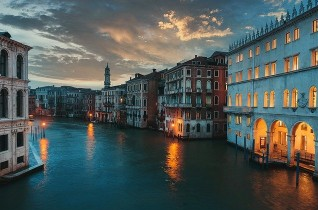


座標は左上１から数えて右に行き、端まで行ったら下の行で右下まで連続整数
はじめは右下が空


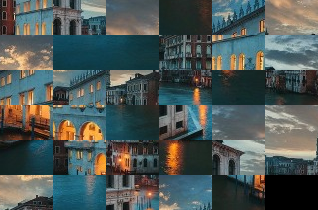

動かしたい画像の座標を入力:35


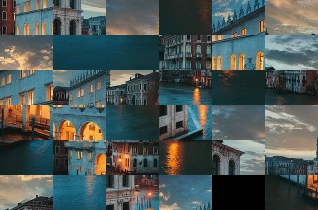

動かしたい画像の座標を入力:34


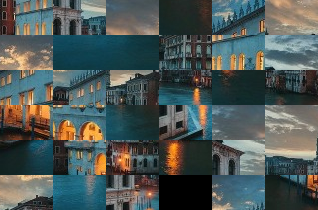

KeyboardInterrupt: ignored

In [159]:
import random

# Colab環境で img の画像を画面に表示
cv2_imshow(img)
print('')

#画像の配置をランダムにする。完成不可能な配置なら可能な配置になるまでやり直す処理
go_cou = 1
del num_li2[-1]

while go_cou % 2 == 1:
  num_li2 = random.sample(num_li2,len(num_li2))
  num_li = num_li2.copy()
  #print(num_li)
  go_cou = 0
  for i in range(len(num_li2)):
    if num_li2[i] != i:
      num_li2[num_li2.index(i)] = num_li2[i]
      num_li2[i] = i
      go_cou += 1
num_li.append(dif**2-1)
#print(num_li)

im_ran = []
for i in num_li:
  exec("im_ran.append(im{})".format(i))


last_im = im_ran[-1]
last_num = num_li[-1]

#画像を貼るための黒画像を生成
bla = np.zeros((tate,yoko,3), np.uint8)
bla_za = za_li[-1]

#マスごとに画像を張り付ける
for i in range(dif**2-1):
  #cv2.imshow(im_li[i])
  bla[za_li[i][0]: za_li[i][0] + int(tate/dif), za_li[i][1]: za_li[i][1] + int(yoko/dif)] = im_ran[i]


#ここから実行中の処理
import time
bla_basho = dif**2
count = 0
print("座標は左上１から数えて右に行き、端まで行ったら下の行で右下まで連続整数")
print("はじめは右下が空")
cv2_imshow(bla)

time.sleep(1)
while True:
  n = int(input("動かしたい画像の座標を入力:"))
  #画像を入れ替える処理
  if n == bla_basho+1 or n == bla_basho-1 or n == bla_basho+dif or n == bla_basho-dif:
    im_ran[bla_basho-1] = im_ran[n-1]
    im_ran[n-1] = last_im
    num_li[bla_basho-1] = num_li[n-1]
    num_li[n-1] = last_num
    bla[za_li[bla_basho-1][0]:za_li[bla_basho-1][0] + int(tate/dif) , za_li[bla_basho-1][1]:za_li[bla_basho-1][1] + int(yoko/dif) ] = im_ran[bla_basho-1]

    bla_basho = n
    bla[za_li[bla_basho-1][0]:za_li[bla_basho-1][0] + int(tate/dif) , za_li[bla_basho-1][1]:za_li[bla_basho-1][1] + int(yoko/dif) ] = np.zeros((int(tate/dif),int(yoko/dif),3), np.uint8)
    
    cv2_imshow(bla)

    #完成したときに終了する処理
    #print(num_li)
    cou = 0
    for i in range(dif**2):
      if num_li[i] == i:
         cou+=1
    if cou == dif**2:
      bla[za_li[bla_basho-1][0]:za_li[bla_basho-1][0] + int(tate/dif) , za_li[bla_basho-1][1]:za_li[bla_basho-1][1] + int(yoko/dif) ] = im_ran[bla_basho-1]
      print("great!")
      cv2_imshow(bla)
      break
    
    time.sleep(1)